# ***E-commerce Customer Segmentation***


Installing packages


*  Pandas
*  Scikit-learn
*  Matplotlib
*  Seaborn






In [1]:
!pip install pandas scikit-learn matplotlib seaborn


In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


*Converting execl file into panda dataframe*

In [3]:
# Replace 'your_file_path.xlsx' with the actual path to your Excel file
file_path = '/content/drive/MyDrive/cust_data.xlsx'

# Load the dataset into a Pandas DataFrame
df = pd.read_excel(file_path)


In [4]:
df.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [5]:
# shape of df before dropping Nan
df.shape

(30000, 38)

## ***DATA PROCESSING***

*Missing values*

> *Droping the 'Nan' datas because comparing to the size of the dataset the 'Nan' values are too much small and does not effect the clustering process.*



In [6]:
# Use isna() or isnull() to check for NaN values and sum() to get the count
nan_count = df['Gender'].isna().sum()

print(f"Number of NaN values in 'Gender': {nan_count}")

Number of NaN values in 'Gender': 2724


In [7]:
# Drop rows with NaN values
df.dropna(inplace=True)

In [8]:
df.shape

(27276, 38)

#*EDA and Feature Engineering*

>* Visualizing different features and the relationship between them


>* Encoding the categorical datas in 'Gender' column



















*Gender counts*

F    22054
M     5222
Name: Gender, dtype: int64


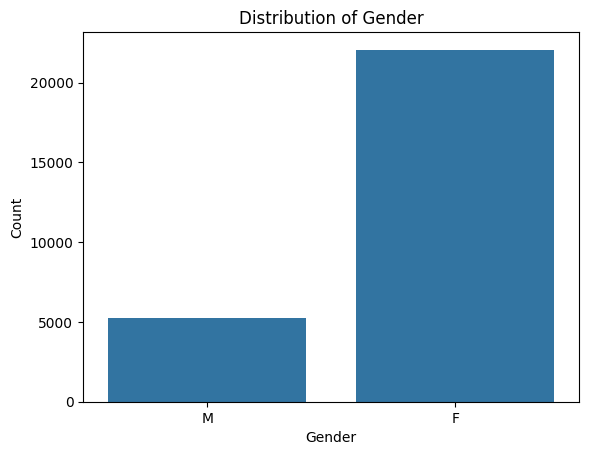

In [9]:
# Plot a countplot using seaborn
sns.countplot(x='Gender', data=df)

# Use value_counts to get the count of each unique value
gender_counts = df['Gender'].value_counts()

# Print the counts
print(gender_counts)

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')

# Show the plot
plt.show()

*Counts of 'Orders' made by 'Gender'*

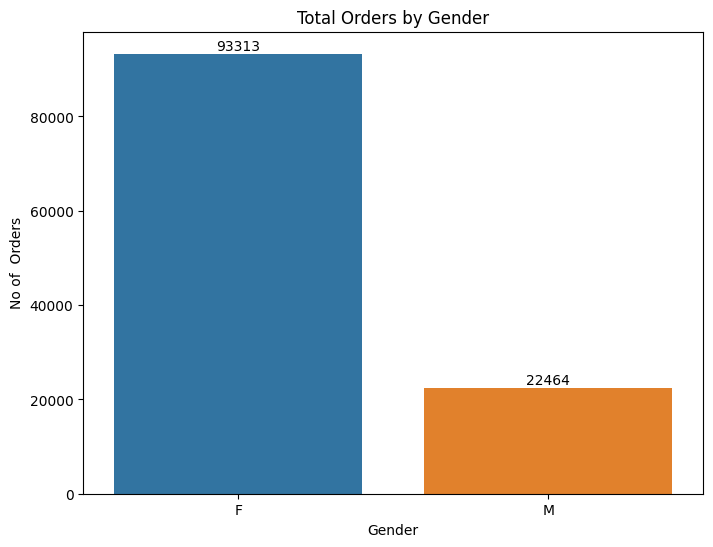

In [11]:

# Aggregate the total count of orders for each gender
total_orders = df.groupby('Gender')['Orders'].sum().reset_index()

# Get unique gender values
unique_genders = total_orders['Gender'].unique()

# Plot a bar plot to visualize the total count of orders by gender
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Orders',hue='Gender',data=total_orders,errorbar=None)

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('No of  Orders')
plt.title('Total Orders by Gender')

# Add values on top of each bar
for index, value in enumerate(total_orders['Orders']):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Show the plot
plt.show()


*Number of searches made by male and female for 35 brands*

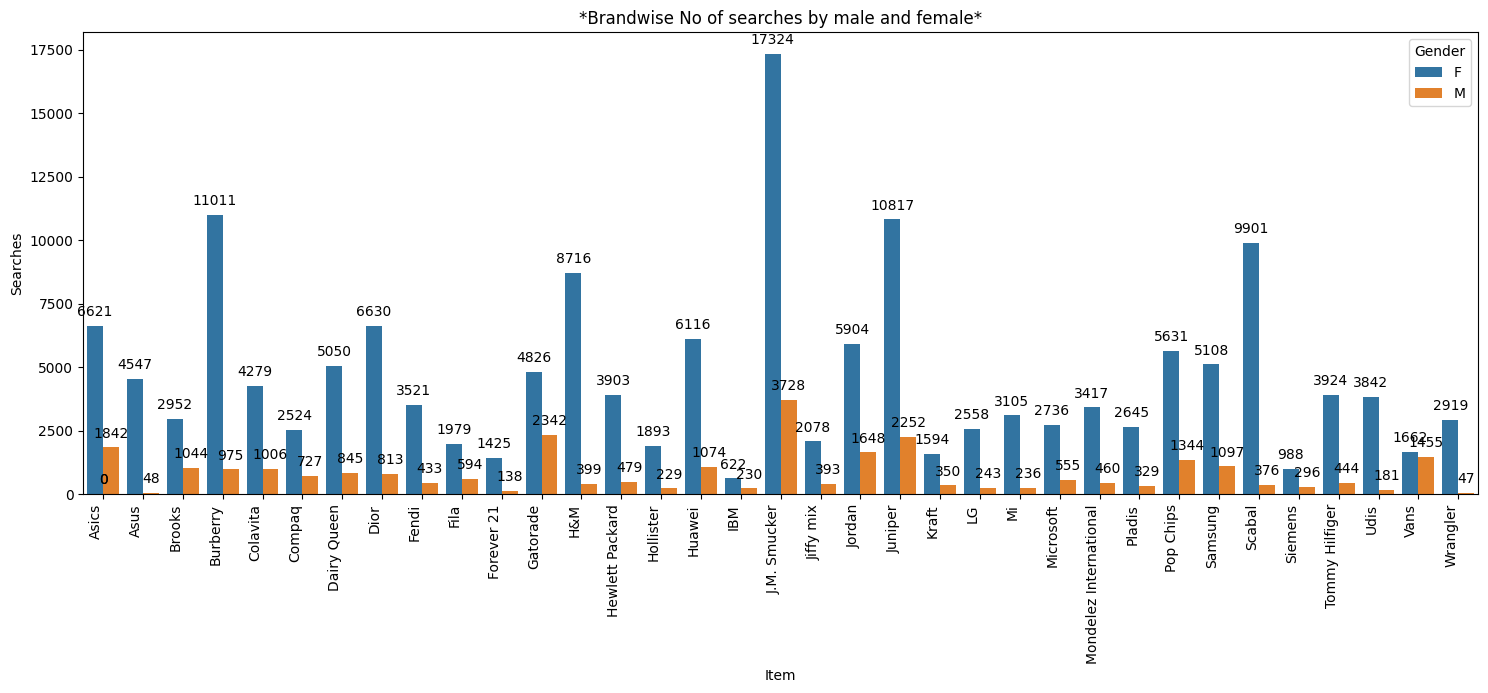

In [12]:


# Melt the DataFrame to make it suitable for plotting
melted_df = pd.melt(df, id_vars='Gender', value_vars=['Jordan', 'Gatorade','Samsung','Asus','Udis',
                                                      'Mondelez International','Wrangler','Vans','Fila','Brooks',
                                                      'H&M','Dairy Queen','Fendi','Hewlett Packard','Pladis','Asics','Siemens','J.M. Smucker',
                                                      'Pop Chips','Juniper','Huawei','Compaq','IBM','Burberry','Mi','LG',
                                                      'Dior','Scabal','Tommy Hilfiger','Hollister','Forever 21','Colavita',
                                                      'Microsoft','Jiffy mix','Kraft'], var_name='Item', value_name='Count')

# Group by Gender and Item, then calculate the sum
grouped_df = melted_df.groupby(['Gender', 'Item'])['Count'].sum().reset_index()



## Plot a bar plot using seaborn
plt.figure(figsize=(18, 6))
ax = sns.barplot(x='Item', y='Count', hue='Gender', data=grouped_df, errorbar=None)

# Annotate each bar with its count
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Add labels and title
plt.xlabel('Item')
plt.ylabel('Searches')
plt.title('*Brandwise No of searches by male and female*')

# Rotate x-axis labels
plt.xticks(rotation=90, ha='right')

# Show the plot
plt.show()


DataFrame of Total count of searches for each item:


Text(0.5, 1.0, 'TOP SEARCHED BRANDS')

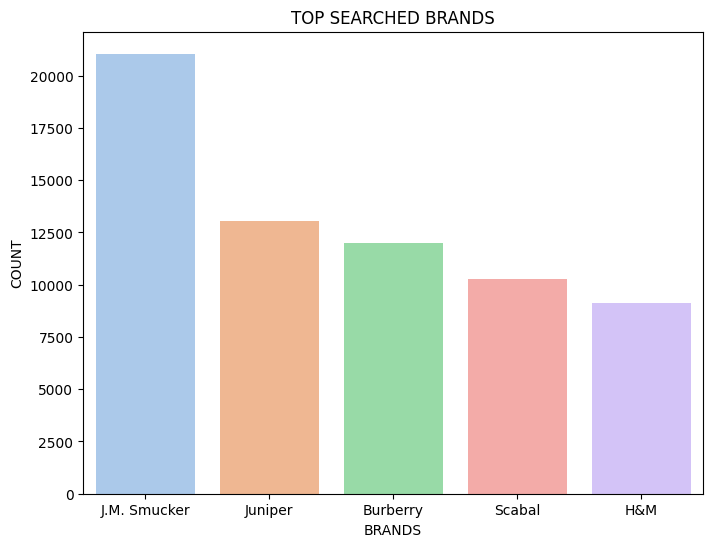

In [13]:
# Define the range of columns from 'Dress' to 'Jewelry' (inclusive)
start_column = 'Jordan'
end_column = 'Kraft'

# Sum the counts of items across the specified range of columns
total_count = df.loc[:, start_column:end_column].sum(axis=0)

# Convert to DataFrame
total_count_df = pd.DataFrame({'BRAND': total_count.index, 'COUNT': total_count.values})

print("DataFrame of Total count of searches for each item:")
total_count_df

# Sort the DataFrame by the 'COUNT' column in descending order
top_searched = total_count_df.sort_values(by='COUNT', ascending=False)
top_searched.head()

# Generate random colors for the bars
num_bars = len(top_searched.head())
random_colors = sns.color_palette("pastel", num_bars)
# Plot a bar plot to visualize the total count of orders by gender
plt.figure(figsize=(8, 6))
sns.barplot(x='BRAND', y='COUNT', data=top_searched.head(),hue='BRAND',palette=random_colors,errorbar=None,legend=False)



# Add labels and title
plt.xlabel('BRANDS')
plt.ylabel('COUNT')
plt.title('TOP SEARCHED BRANDS')

In [14]:
# Find the maximum and minimum values and their respective items
max_item = total_count.idxmax()
min_item = total_count.idxmin()
max_value = total_count[max_item]
min_value = total_count[min_item]

print("Maximum Count Item:", max_item, "Count:", max_value)
print("Minimum Count Item:", min_item, "Count:", min_value)

Maximum Count Item: J.M. Smucker Count: 21052
Minimum Count Item: IBM Count: 852


In [15]:
df

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,F,4,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,29997,M,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,29998,M,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,29999,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# *Feature Engineering*

> *Encoding 'Gender'*



In [16]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()


en_df=df
# Strip any leading or trailing whitespace in column names
en_df.columns = en_df.columns.str.strip()

# Encode 'Gender' column
en_df['Gender'] = label_encoder.fit_transform(en_df['Gender'])

# Print DataFrame
en_df


,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,1,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,1,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,0,4,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,29997,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,29998,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,29999,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## *Finding Suitable No of clusters*

In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# Specify the range of clusters
n_clusters_range = range(2, 31)  # From 2 to 20 clusters

# Lists to store n_clusters and silhouette scores
n_clusters_list = []
silhouette_avg_list = []

for n_clusters in n_clusters_range:
    # Initialize KMeans object
    kmeans = KMeans(n_clusters=n_clusters,n_init=10, random_state=42)

    # Fit KMeans to the data
    kmeans.fit(en_df)

    # Get cluster labels
    cluster_labels = kmeans.labels_

    # Compute the silhouette score
    silhouette_avg = silhouette_score(en_df, cluster_labels)

    # Append n_clusters and silhouette score to the lists
    n_clusters_list.append(n_clusters)
    silhouette_avg_list.append(silhouette_avg)

# Create a DataFrame from the lists
silhouette_df = pd.DataFrame({'n_clusters': n_clusters_list, 'silhouette_avg': silhouette_avg_list})
silhouette_df


,n_clusters,silhouette_avg
0,2,0.626294
1,3,0.590051
2,4,0.572239
3,5,0.560863
4,6,0.553824
5,7,0.548416
6,8,0.545034
7,9,0.540970
8,10,0.538868
9,11,0.537380


Text(0.5, 1.0, 'SILLHOUETTE SCORE')

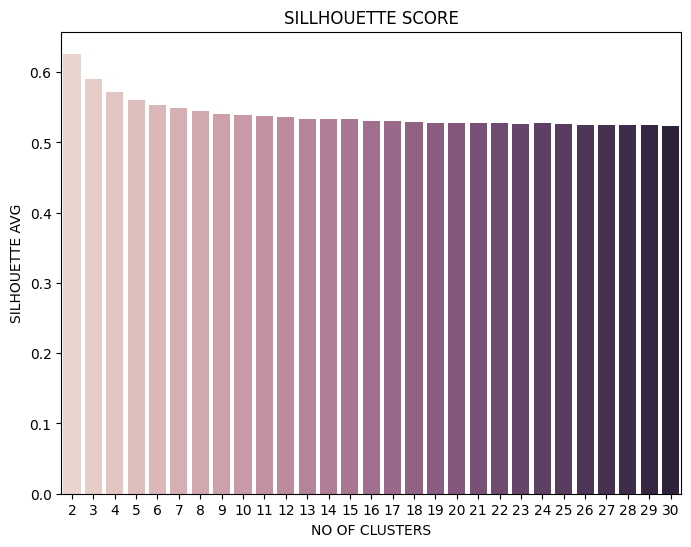

In [18]:
# Plot a bar plot to visualize the total count of orders by gender
plt.figure(figsize=(8, 6))
sns.barplot(x='n_clusters', y='silhouette_avg', data=silhouette_df,hue='n_clusters',errorbar=None,legend=False)



# Add labels and title
plt.xlabel('NO OF CLUSTERS')
plt.ylabel('SILHOUETTE AVG')
plt.title('SILLHOUETTE SCORE')

# *K MEANS CLUSTERING*

In [29]:
from sklearn.cluster import KMeans

# Specify the number of clusters
n_clusters = 3 # choosing 3 clusters to grp the customers

# Initialize KMeans object
kmeans = KMeans(n_clusters=n_clusters,n_init=10, random_state=42)

# Fit KMeans to the data
kmeans.fit(en_df)

# Get cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to the DataFrame
en_df['Cluster'] = cluster_labels

# Display the first few rows of the DataFrame with cluster labels
print(df.head())



   Cust_ID  Gender  Orders  Jordan  Gatorade  Samsung  Asus  Udis  \
0        1       1       7       0         0        0     0     0   
1        2       0       0       0         1        0     0     0   
2        3       1       7       0         1        0     0     0   
3        4       0       0       0         0        0     0     0   
5        6       0       4       0         0        0     0     0   

   Mondelez International  Wrangler  ...  Dior  Scabal  Tommy Hilfiger  \
0                       0         0  ...     0       0               0   
1                       0         0  ...     1       0               0   
2                       0         0  ...     0       0               0   
3                       0         0  ...     0       0               0   
5                       0         0  ...     0       1               0   

   Hollister  Forever 21  Colavita  Microsoft  Jiffy mix  Kraft  Cluster  
0          0           0         0          0          0      0  

In [20]:
en_df


,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Cluster
0,1,1,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,3,1,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,6,0,4,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,29997,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,29998,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,29999,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# Assuming 'Cust_ID', 'Gender', and 'Orders' are the columns you want to drop
brd = en_df.drop(columns=['Cust_ID', 'Gender', 'Orders'])


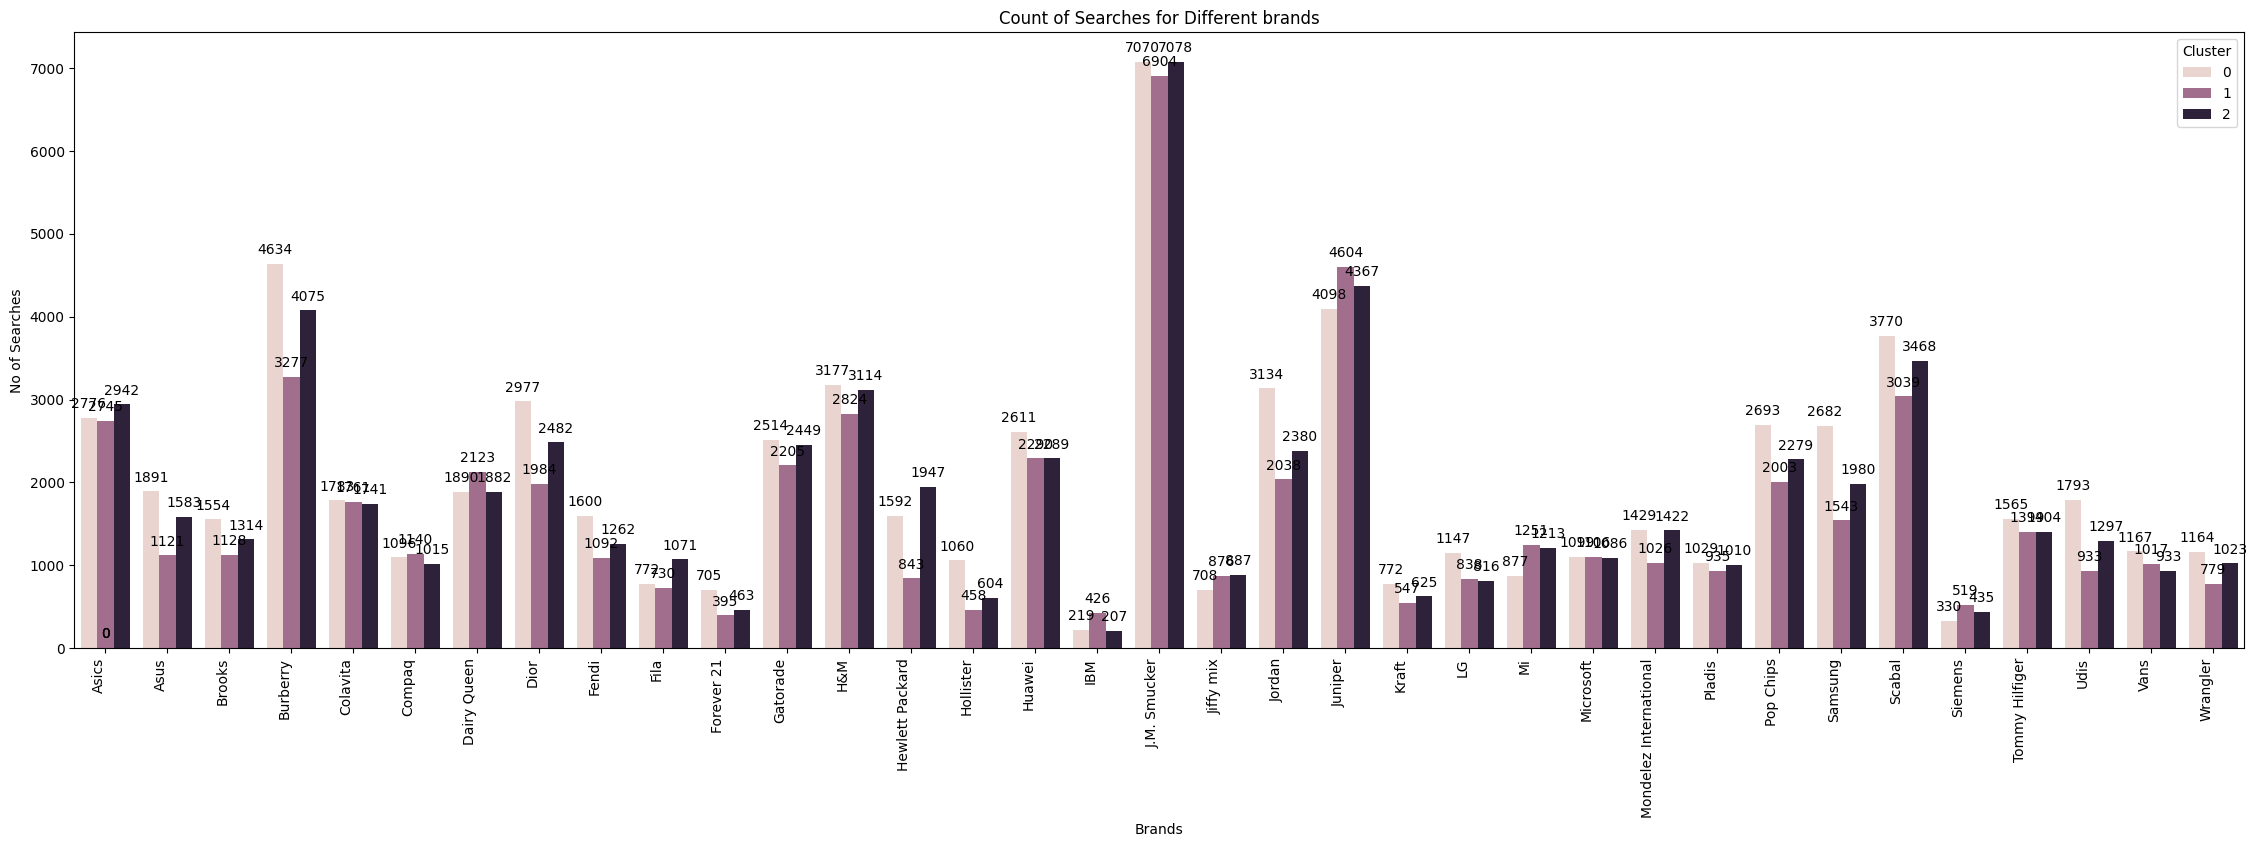

In [22]:


# Melt the DataFrame to make it suitable for plotting
melted_df = pd.melt(brd, id_vars='Cluster', value_vars=['Jordan', 'Gatorade','Samsung','Asus','Udis',
                                                      'Mondelez International','Wrangler','Vans','Fila','Brooks',
                                                      'H&M','Dairy Queen','Fendi','Hewlett Packard','Pladis','Asics','Siemens','J.M. Smucker',
                                                      'Pop Chips','Juniper','Huawei','Compaq','IBM','Burberry','Mi','LG',
                                                      'Dior','Scabal','Tommy Hilfiger','Hollister','Forever 21','Colavita',
                                                      'Microsoft','Jiffy mix','Kraft'],
                    var_name='Item', value_name='Count')

# Group by Gender and Item, then calculate the sum
grouped_df = melted_df.groupby(['Cluster', 'Item'])['Count'].sum().reset_index()

# Plot a bar plot using seaborn
plt.figure(figsize=(28, 8))
ax = sns.barplot(x='Item', y='Count', hue='Cluster', data=grouped_df, errorbar=None)

# Annotate each bar with its count
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Add labels and title
plt.xlabel('Brands')
plt.ylabel('No of Searches')
plt.title('Count of Searches for Different brands')

# Rotate x-axis labels
plt.xticks(rotation=90, ha='right')


# Show the plot
plt.show()


# *Customer Segmentation based on clusters*

In [23]:
# Initialize an empty dictionary to store DataFrames for each cluster
clustered_data = {}

# Iterate over unique cluster labels
for cluster_label in en_df['Cluster'].unique():
    # Filter the DataFrame based on the current cluster label
    cluster_df = en_df[en_df['Cluster'] == cluster_label].copy()
    # Store the filtered DataFrame in the dictionary with the cluster label as the key
    clustered_data[cluster_label] = cluster_df

# Access the DataFrames for each cluster
for cluster_label, cluster_df in clustered_data.items():
    print(f"Cluster {cluster_label}:")
    print(cluster_df)


Cluster 1:
       Cust_ID  Gender  Orders  Jordan  Gatorade  Samsung  Asus  Udis  \
0            1       1       7       0         0        0     0     0   
1            2       0       0       0         1        0     0     0   
2            3       1       7       0         1        0     0     0   
3            4       0       0       0         0        0     0     0   
5            6       0       4       0         0        0     0     0   
...        ...     ...     ...     ...       ...      ...   ...   ...   
10014    10015       0       5       1         0        0     0     0   
10015    10016       0       0       0         0        0    13     0   
10017    10018       0       7       1         0        0     0     0   
10018    10019       0      10       0         0        0     0     0   
10019    10020       0      10       0         0        0     0     0   

       Mondelez International  Wrangler  ...  Dior  Scabal  Tommy Hilfiger  \
0                           0     

In [30]:
                                                                                      # Filter data for each cluster
grp1= en_df[en_df['Cluster'] == 0].copy()
grp2 = en_df[en_df['Cluster'] == 1].copy()
grp3 = en_df[en_df['Cluster'] == 2].copy()
# Display the first few rows of each cluster DataFrame
print("Cluster 0 DataFrame:")
grp1.head()



Cluster 0 DataFrame:


,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Cluster
20018,20019,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20019,20020,1,5,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
20020,20021,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20021,20022,1,6,0,0,0,0,0,0,0,...,0,0,0,0,0,11,0,0,0,0
20022,20023,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
print("\nCluster 1 DataFrame:")
grp2.head()


Cluster 1 DataFrame:


,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Cluster
0,1,1,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,3,1,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,6,0,4,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1


In [32]:
print("\nCluster 2 DataFrame:")
grp3.head()


Cluster 2 DataFrame:


,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Cluster
10020,10021,0,1,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,2
10021,10022,1,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2
10022,10023,0,4,0,1,0,0,0,1,0,...,0,0,1,0,0,0,1,0,1,2
10023,10024,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
10024,10025,0,11,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,2
